In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

### Carregando o conjunto de dados para regressão. 

+ Vamos usar o conjunto de dados habitacional da Califórnia e criar um regressor com uma rede neural.
    + Esse conjunto possui 20640 exemplos e 8 atributos e 1 rótulo numéricos.
    + O rótulo é o valor médio de casas no estado da Califórnia expresso em centenas de milhares de dólares.
    + Para mais informações, acesse: https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset

+ Usamos a função `fetch_california_housing()` do Scikit-Learn para carregar os dados.

+ Depois de carregar os dados, dividimos em um conjunto de treinamento, um conjunto de validação e um conjunto de teste, e padronizamos todos os atributos.

In [3]:
# Baixa a base de dados.
housing = fetch_california_housing()

# Divide o conjunto total de exemplos em conjuntos de treinamento e teste.
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)

# Divide o conjunto de treinamento em conjuntos de treinamento (menor) e validação.
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

# Aplica padronização às matrizes de atributos.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

### Criando e compilando um modelo sequencial.

+ Construir, treinar, avaliar e usar um regressor MLP usando a API Sequential é bastante semelhante ao que fizemos para a classificação. 

+ O modelo abaixo é o de um regressor MLP com **uma oculta** com 30 neurônios. 

+ As principais diferenças para o modelo de classificação são:
    + Camada de saída possui um único neurônio (já que queremos apenas prever um único valor) e não usa função de ativação (se o parâmetro `activation` não é especificado, usa-se ativação "linear" por padrão). 
    + Função de perda é o erro quadrático médio (MSE).
    
**OBS**.: Vejam que podemos passar uma lista de camadas para o construtor da classe `Sequential` ao invés de usar o método `add()`.

In [4]:
model = keras.models.Sequential(
    [
        keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
        keras.layers.Dense(1)
    ]
)

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

**IMPORTANTE**

+ Para podermos configurar valores diferentes do padrão, precisamos instanciar um objeto da classe do otimizador com o valor desejado para os hiperparâmetros (e.g., `keras.optimizers.SGD(learning_rate=1e-3)`).

### Resumo do modelo.

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


### Treinando o modelo.

In [6]:
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    validation_data=(X_valid, y_valid)
                   )

Epoch 1/50
363/363 [==============================] - 2s 4ms/step - loss: 1.6419 - val_loss: 0.8560
Epoch 2/50
363/363 [==============================] - 1s 3ms/step - loss: 0.7047 - val_loss: 0.6531
Epoch 3/50
363/363 [==============================] - 1s 3ms/step - loss: 0.6345 - val_loss: 0.6099
Epoch 4/50
363/363 [==============================] - 1s 3ms/step - loss: 0.5977 - val_loss: 0.5658
Epoch 5/50
363/363 [==============================] - 1s 3ms/step - loss: 0.5706 - val_loss: 0.5355
Epoch 6/50
363/363 [==============================] - 1s 3ms/step - loss: 0.5472 - val_loss: 0.5173
Epoch 7/50
363/363 [==============================] - 1s 3ms/step - loss: 0.5288 - val_loss: 0.5081
Epoch 8/50
363/363 [==============================] - 1s 3ms/step - loss: 0.5130 - val_loss: 0.4799
Epoch 9/50
363/363 [==============================] - 1s 3ms/step - loss: 0.4992 - val_loss: 0.4690
Epoch 10/50
363/363 [==============================] - 1s 3ms/step - loss: 0.4875 - val_loss: 0.4656

### Avaliando o modelo.

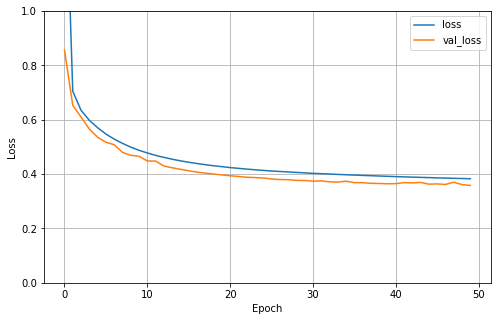

In [7]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.show()

### Fazendo predições com o modelo treinado.

+ Usamos o método `predict()` do modelo para fazer previsões em novos exemplos. 
    + Usaremos apenas os 3 primeiros exemplos do conjunto de teste.
    + Esse é o conjunto normalmente usado para se avaliar o grau de generalização do modelo.    

In [8]:
X_new = X_test[:3]
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 119ms/step


In [9]:
for i in range(len(y_pred)):
    print('Actual: %1.3f - Predicted: %1.3f' % (y_test[i], y_pred[i]))

Actual: 0.477 - Predicted: 0.475
Actual: 0.458 - Predicted: 1.792
Actual: 5.000 - Predicted: 3.463
